# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante:
Deiry Sofia Navas Muriel
#### Segundo Integrante:
David Alejandro Marin Alejandro

In [1]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [2]:
#cargamos la bd de entrenamiento
db = np.loadtxt('BDatos/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print ("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [3]:
X = DataBase[:,0:12]

Y = DataBase[:,12]

Definimos la función

In [4]:
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 

Complete el código siguiente para usar la regresión por vectores de suporte usando la librería sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [7]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time

Y_test_g = None
Y_predict_g = None

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}
#clf = ...
def main(kernel='rbf', C=100, gamma=1):
    global Y_test_g
    global Y_predict_g
    
    tiempo_i = time.time()
    #Implemetamos la metodología de validación cross validation con 10 folds
    Folds = 5
    Errores = np.ones(Folds)
    j = 0
    kf = KFold(n_splits=Folds)
    percentVectors = np.zeros(Folds)

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        #normalizamos los datos
        scaler = preprocessing.StandardScaler().fit(X_train)
        Xtrain = scaler.transform(X_train)
        Xtest = scaler.transform(X_test)

        #Complete el código
        clf = SVR(kernel=kernel, C=C, gamma=gamma, cache_size=200)
        
        # Entrenar el modelo
        #modelo = ...
        clf.fit(Xtrain,y_train)

        #Calculamos el porcentaje de vector de soporte
        percentVectors[j] = (len(clf.support_vectors_)/len(Xtrain))

        # Validación del modelo
        ypred = clf.predict(Xtest)
        Y_test_g = y_test
        Y_predict_g = ypred

        Errores[j] = MAPE(ypred, y_test)
        j+=1

    # print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    # print ("Porcentaje de vectores de soporte",round(percentVectors.sum()/Folds, 5))
    print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
    
    mean = round(np.mean(Errores),4)
    std = round(np.std(Errores),4)
    percent = round(percentVectors.sum()/Folds, 4)
    return mean,std,percent

main()



Tiempo total de ejecución: 7.0290467739105225 segundos.


(0.2259, 0.1109, 0.2191)

In [10]:
kernels = ['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']
cs = [0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]
gammas = [0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1]
medias = np.zeros(len(kernels))
stds = np.zeros(len(kernels))
percents = np.zeros(len(kernels))
for i in range(0, len(kernels)):
    if kernels[i] is 'lineal':
        kernel = 'linear'
    elif kernels[i] is 'rbf':
        kernel =  'rbf'
    if gammas[i] is 0:
        gamma = 'auto'
    else:
        gamma = gammas[i]
    medias[i],stds[i],percents[i] = main(kernel=kernel, C=cs[i], gamma=gamma)
    print (str(medias[i]),str(stds[i]),str(percents[i]))



Tiempo total de ejecución: 1.9148824214935303 segundos.
0.2153 0.0646 0.3786


Tiempo total de ejecución: 2.3586971759796143 segundos.
0.2449 0.0963 0.3767


Tiempo total de ejecución: 5.3367393016815186 segundos.
0.2768 0.1346 0.385


Tiempo total de ejecución: 23.93304753303528 segundos.
0.287 0.1507 0.3862


Tiempo total de ejecución: 173.10643339157104 segundos.
0.2866 0.15 0.3863


Tiempo total de ejecución: 1446.423012971878 segundos.
0.2885 0.1532 0.3863


Tiempo total de ejecución: 6.792855501174927 segundos.
0.4015 0.2062 0.747


Tiempo total de ejecución: 5.631949186325073 segundos.
0.3285 0.1402 0.6426


Tiempo total de ejecución: 6.888569355010986 segundos.
0.4905 0.2859 0.7694


Tiempo total de ejecución: 4.084109544754028 segundos.
0.183 0.0381 0.4434


Tiempo total de ejecución: 2.5441789627075195 segundos.
0.1793 0.0506 0.278


Tiempo total de ejecución: 5.192148447036743 segundos.
0.3906 0.2342 0.5616


Tiempo total de ejecución: 1.8440783023834229 segundos.
0.1475 0

## Ejercicio 2

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [18]:

import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(kernels),
    'C' : pd.Series(cs),
    'gamma' : pd.Series(gammas)})
df_types["MAPE Promedio"] = medias
df_types["Intervalo de confianza"] = stds
df_types["% de Vectores de Soporte"] = percents
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["MAPE Promedio"][23] = "0.2259"
df_types["Intervalo de confianza"][23] = "0.1109"
df_types["% de Vectores de Soporte"][23] = "0.2191"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [19]:
qgrid_widget.get_changed_df()

MAPE Promedio  Intervalo de confianza  \
Kernel C       gamma                                          
lineal 0.001   0.00          0.2153                  0.0646   
       0.010   0.00          0.2449                  0.0963   
       0.100   0.00          0.2768                  0.1346   
       1.000   0.00          0.2870                  0.1507   
       10.000  0.00          0.2866                  0.1500   
       100.000 0.00          0.2885                  0.1532   
rbf    0.001   0.01          0.4015                  0.2062   
               0.10          0.3285                  0.1402   
               1.00          0.4905                  0.2859   
       0.010   0.01          0.1830                  0.0381   
               0.10          0.1793                  0.0506   
               1.00          0.3906                  0.2342   
       0.100   0.01          0.1475                  0.0382   
               0.10          0.1499                  0.0545   
               1.00          0.2686                  0.1504   
       1.000   0.01          0.2044                  0.1874   
               0.10          0.1917                  0.1404   
               1.00          0.2379                  0.1300   
       10.000  0.01          0.5590                  0.9123   
               0.10          0.1803                  0.1709   
               1.00          0.2226                  0.1083   
       100.000 0.01          0.6904                  1.2097   
               0.10          0.2141                  0.2036   
               1.00          0.2259                  0.1109   

                      % de Vectores de Soporte  
Kernel C       gamma                            
lineal 0.001   0.00                     0.3786  
       0.010   0.00                     0.3767  
       0.100   0.00                     0.3850  
       1.000   0.00                     0.3862  
       10.000  0.00                     0.3863  
       100.000 0.00                     0.3863  
rbf    0.001   0.01                     0.7470  
               0.10                     0.6426  
               1.00                     0.7694  
       0.010   0.01                     0.4434  
               0.10                     0.2780  
               1.00                     0.5616  
       0.100   0.01                     0.1905  
               0.10                     0.1518  
               1.00                     0.2690  
       1.000   0.01                     0.1220  
               0.10                     0.1657  
               1.00                     0.2167  
       10.000  0.01                     0.1638  
               0.10                     0.1044  
               1.00                     0.2133  
       100.000 0.01                     0.1021  
               0.10                     0.1046  
               1.00                     0.2191

3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?

R/: Subir la dimensionalidad de las muestras, de tal forma que encuentre una solución lineal así sea que los datos no sean lineales.

3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.

R/: si provee una informacion similar porque los vectores de soporte describen el comportamiento que va tener mi regresion obteniendo los mas relevantes para ser seleccionados como vector de soporte, pero tiene un porcentaje de vectores mas alto debido a que tiene que generalizar bien los datos.


3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.



Tiempo total de ejecución: 3.3130393028259277 segundos.


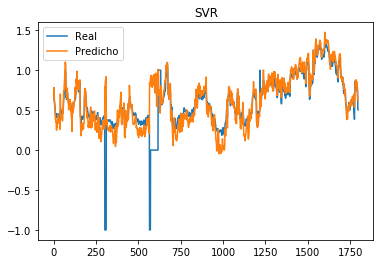

In [18]:
# El mejor modelo es el que tiene C=0.1 y gamma=0.01
main(C=0.1,gamma=0.01)
plt.plot(Y_test_g)
plt.plot(Y_predict_g)
plt.title('SVR')
plt.legend(['Real','Predicho'])
plt.show()